In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ParameterGrid
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, fpgrowth, apriori
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Load dataset
data = pd.read_csv("Groceries_dataset.csv")
transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
# Initialize and fit the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [6]:
# Define the parameter grid for min_support and min_threshold
param_grid = {
    'min_support': [0.005, 0.01, 0.02, 0.03, 0.05], 
    'min_threshold': [0.1, 0.2, 0.3, 0.5, 0.6, 0.7]
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_score = -1
best_params = {}


In [7]:
# Function to evaluate rules on the validation set
def evaluate_rules(rules, validation_df):
    if rules.empty:
        return 0
    return rules['lift'].mean()


In [8]:
# Iterate over the parameter grid
for params in ParameterGrid(param_grid):
    scores = []
    
    for train_index, val_index in kf.split(df):
        train_df, val_df = df.iloc[train_index], df.iloc[val_index]
        
        frequent_itemsets = fpgrowth(train_df, min_support=params['min_support'], use_colnames=True)
        if not frequent_itemsets.empty:
            rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=params['min_threshold'])
            score = evaluate_rules(rules, val_df)
            scores.append(score)
    
    avg_score = np.mean(scores)
    
    if avg_score > best_score:
        best_score = avg_score
        best_params = params

    print(f"Tested Parameters: {params}, Average Score: {avg_score}")

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Tested Parameters: {'min_support': 0.005, 'min_threshold': 0.1}, Average Score: 0.8605008733784025
Tested Parameters: {'min_support': 0.005, 'min_threshold': 0.2}, Average Score: 0.0
Tested Parameters: {'min_support': 0.005, 'min_threshold': 0.3}, Average Score: 0.0
Tested Parameters: {'min_support': 0.005, 'min_threshold': 0.5}, Average Score: 0.0
Tested Parameters: {'min_support': 0.005, 'min_threshold': 0.6}, Average Score: 0.0
Tested Parameters: {'min_support': 0.005, 'min_threshold': 0.7}, Average Score: 0.0
Tested Parameters: {'min_support': 0.01, 'min_threshold': 0.1}, Average Score: 0.7927663414524713
Tested Parameters: {'min_support': 0.01, 'min_threshold': 0.2}, Average Score: 0.0
Tested Parameters: {'min_support': 0.01, 'min_threshold': 0.3}, Average Score: 0.0
Tested Parameters: {'min_support': 0.01, 'min_threshold': 0.5}, Average Score: 0.0
Tested Parameters: {'min_support': 0.01, 'min_threshold': 0.6}, Average Score: 0.0
Tested Parameters: {'min_support': 0.01, 'min_thres

In [9]:
frequent_itemsets = fpgrowth(df, min_support=best_params['min_support'], use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=best_params['min_threshold'])
print("Optimized Rules:\n", rules)
print("Support, Confidence, and Lift for optimized rules:")
print(rules[['support', 'confidence', 'lift']])

Optimized Rules:
            antecedents         consequents  antecedent support  \
0             (yogurt)        (whole milk)            0.085879   
1            (sausage)        (whole milk)            0.060349   
2             (pastry)        (whole milk)            0.051728   
3        (canned beer)        (whole milk)            0.046916   
4               (soda)        (whole milk)            0.097106   
5        (frankfurter)        (whole milk)            0.037760   
6        (frankfurter)  (other vegetables)            0.037760   
7         (rolls/buns)        (whole milk)            0.110005   
8   (other vegetables)        (whole milk)            0.122101   
9     (tropical fruit)        (whole milk)            0.067767   
10   (root vegetables)        (whole milk)            0.069572   
11         (pip fruit)        (whole milk)            0.049054   
12     (shopping bags)        (whole milk)            0.047584   
13     (bottled water)        (whole milk)            0.06

In [13]:
frequent_itemsets = fpgrowth(df, min_support=best_params['min_support'], use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=best_params['min_threshold'])
sorted_rules = rules.sort_values(by='lift', ascending=False)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
14,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
16,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114,-0.089246
15,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834,-0.102072
5,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958,-0.118576
18,(pork),(whole milk),0.037091,0.157923,0.005012,0.135135,0.855703,-0.000845,0.973652,-0.149027
11,(pip fruit),(whole milk),0.049054,0.157923,0.006616,0.134877,0.854071,-0.001130,0.973362,-0.152310
17,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040,-0.154748
12,(shopping bags),(whole milk),0.047584,0.157923,0.006349,0.133427,0.844887,-0.001166,0.971732,-0.161610


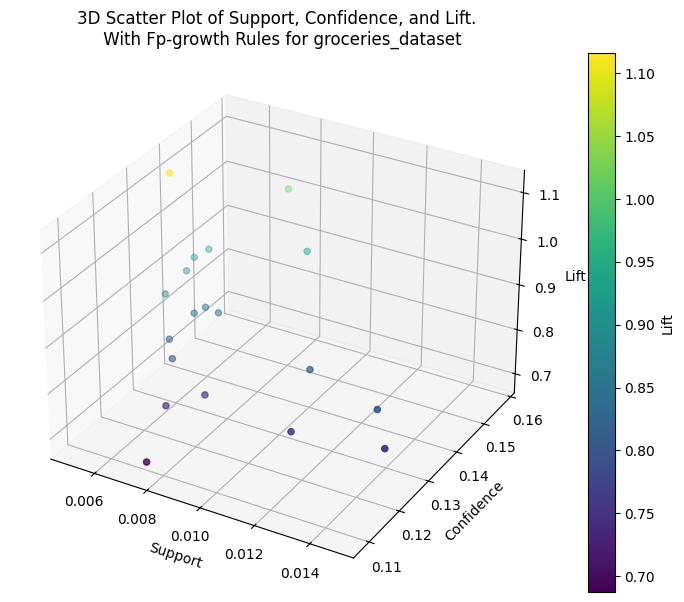

In [18]:
frequent_itemsets = fpgrowth(df, min_support=best_params['min_support'], use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=best_params['min_threshold'])
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(rules['support'], rules['confidence'], rules['lift'], c=rules['lift'], cmap='viridis', marker='o')

cbar = plt.colorbar(sc)
cbar.set_label('Lift')

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')

ax.set_title('3D Scatter Plot of Support, Confidence, and Lift. \n With Fp-growth Rules for groceries_dataset')
plt.show()

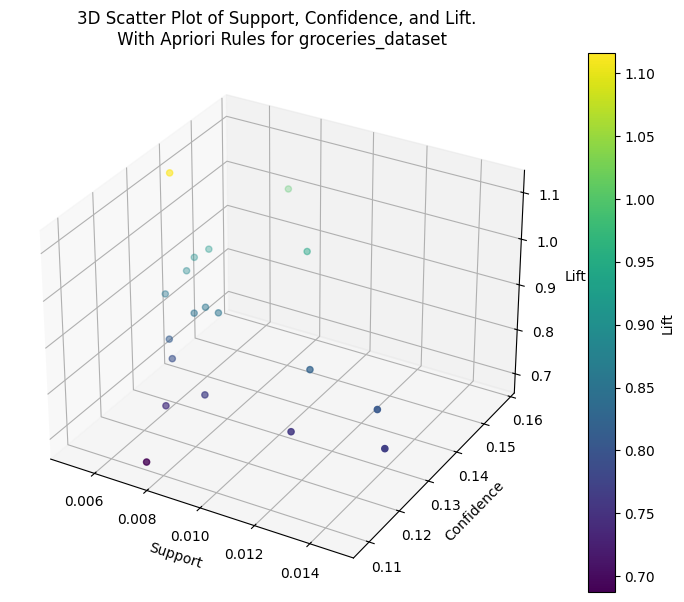

In [15]:

frequent_itemsets = apriori(df, min_support=best_params['min_support'], use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=best_params['min_threshold'])


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(rules['support'], rules['confidence'], rules['lift'], c=rules['lift'], cmap='viridis', marker='o')

cbar = plt.colorbar(sc)
cbar.set_label('Lift')

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')

ax.set_title('3D Scatter Plot of Support, Confidence, and Lift. \n With Apriori Rules for groceries_dataset')

plt.show()


In [11]:
frequent_itemsets = apriori(df, min_support=best_params['min_support'], use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=best_params['min_threshold'])
print("Optimized Rules:\n", rules)
print("Support, Confidence, and Lift for optimized rules:")
print(rules[['support', 'confidence', 'lift']])

Optimized Rules:
            antecedents         consequents  antecedent support  \
0       (bottled beer)        (whole milk)            0.045312   
1      (bottled water)        (whole milk)            0.060683   
2        (canned beer)        (whole milk)            0.046916   
3       (citrus fruit)        (whole milk)            0.053131   
4      (domestic eggs)        (whole milk)            0.037091   
5        (frankfurter)  (other vegetables)            0.037760   
6        (frankfurter)        (whole milk)            0.037760   
7         (newspapers)        (whole milk)            0.038896   
8   (other vegetables)        (whole milk)            0.122101   
9             (pastry)        (whole milk)            0.051728   
10         (pip fruit)        (whole milk)            0.049054   
11              (pork)        (whole milk)            0.037091   
12        (rolls/buns)        (whole milk)            0.110005   
13   (root vegetables)        (whole milk)            0.06

In [12]:
frequent_itemsets = apriori(df, min_support=best_params['min_support'], use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=best_params['min_threshold'])
sorted_rules = rules.sort_values(by='lift', ascending=False)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
14,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
7,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114,-0.089246
4,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834,-0.102072
6,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958,-0.118576
11,(pork),(whole milk),0.037091,0.157923,0.005012,0.135135,0.855703,-0.000845,0.973652,-0.149027
10,(pip fruit),(whole milk),0.049054,0.157923,0.006616,0.134877,0.854071,-0.001130,0.973362,-0.152310
3,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040,-0.154748
15,(shopping bags),(whole milk),0.047584,0.157923,0.006349,0.133427,0.844887,-0.001166,0.971732,-0.161610
